In [1]:
"""
05 MARCH 2024
Adrien Corniere

Making boxplot from different mlr models
"""

import os
from percephone.core.recording import RecordingAmplDet
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import percephone.core.recording as pc
import percephone.analysis.mlr_models as mlrm
from percephone.plts.stats import boxplot, paired_boxplot
from multiprocessing import pool, cpu_count
%matplotlib inline

In [2]:
directory = "C:\\Users\\acorniere\\Desktop\\percephone_data\\"
roi_info = pd.read_excel(directory + "FmKO_ROIs&inhibitory.xlsx")
folders = os.listdir(directory)
# files = os.listdir(directory)
# files_ = [file for file in files if file.endswith("synchro")]

In [3]:
# def oprening_rec(fil,i):
#     rec = pc.RecordingAmplDet(directory + fil + "/", 0, fil, roi_info)
#     mlr_model, name_model = mlrm.r2_model(rec)
#     rec.mlr(mlr_model, name_model)
#     return rec
# 
# workers = cpu_count()
# pool = pool.ThreadPool(processes=workers)
# async_results = [pool.apply_async(oprening_rec, args=(file,i)) for i,file in enumerate(files_)]
# recs = [ar.get() for ar in async_results]

In [4]:
df_exc = pd.DataFrame()
df_inh = pd.DataFrame()
genotypes = ["Genotype"]
tot_exc = ["Total n exc"]
tot_inh = ["Total n inh"]
perc_exc = ["% neurons significant"]
perc_inh = ["% neurons significant"]

# for rec in recs :
for folder in folders:
    path = directory + folder + '\\'
    if os.path.isdir(path):
        print(folder)
        rec = pc.RecordingAmplDet(path, 0, folder, roi_info, correction=False)
        mlr_model, name_model = mlrm.precise_stim_model(rec)
        rec.mlr(mlr_model, name_model)
        genotypes.append(rec.genotype)
        df_exc["labels"] = rec.mlr_labels_exc['text_labels']
        df_inh["labels"] = rec.mlr_labels_inh['text_labels']
        df_exc[rec.filename] = rec.mlr_labels_exc['n_neurons_per_label']
        df_inh[rec.filename] = rec.mlr_labels_inh['n_neurons_per_label']
        tot_exc.append(len(rec.zscore_exc))
        tot_inh.append(len(rec.zscore_inh))
        sum_neurons_exc = np.sum(rec.mlr_labels_exc['n_neurons_per_label'])
        sum_neurons_inh = np.sum(rec.mlr_labels_inh['n_neurons_per_label'])
        percentage_exc = round((sum_neurons_exc / len(rec.zscore_exc))*100)
        percentage_inh = round((sum_neurons_inh / len(rec.zscore_inh)) * 100)
        perc_exc.append(percentage_exc)
        perc_inh.append(percentage_inh)

df_exc.loc[len(df_exc.index)] = tot_exc
df_exc.loc[len(df_exc.index)] = tot_inh
df_exc.loc[len(df_exc.index)] = perc_exc
df_exc.loc[len(df_exc.index)] = genotypes
df_exc.to_excel("output_exc.xlsx", sheet_name='mlr_model')

df_inh.loc[len(df_inh.index)] = tot_exc
df_inh.loc[len(df_inh.index)] = tot_inh
df_inh.loc[len(df_inh.index)] = perc_inh
df_inh.loc[len(df_inh.index)] = genotypes
df_inh.to_excel("output_inh.xlsx", sheet_name='mlr_model')

20220710_4445_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20220715_4456_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20220930_4745_01_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20220930_4756_01_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20221004_4754_01_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20221008_4746_00_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20221205_4939_04_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231008_5890_03_synchro
Behavioural information already incorporated in the analog.
MLR model already computed
20231009_5886_00_synchro
Behavioural information already incorporated in the analog.
MLR model already c

Boxplot plotting.
% neurons act
ShapiroResult(statistic=0.9594160003777937, pvalue=0.8045184193479975)
ShapiroResult(statistic=0.8862359012691667, pvalue=0.2555984431327985)
TtestResult(statistic=2.4916758804786094, pvalue=0.027009327729548914, df=13.0)
Boxplot plotting.
% neurons desact
ShapiroResult(statistic=0.8760001962672874, pvalue=0.17238331614170238)
ShapiroResult(statistic=0.6948916897686997, pvalue=0.0032597568001068227)
MannwhitneyuResult(statistic=39.0, pvalue=0.2159249389401403)


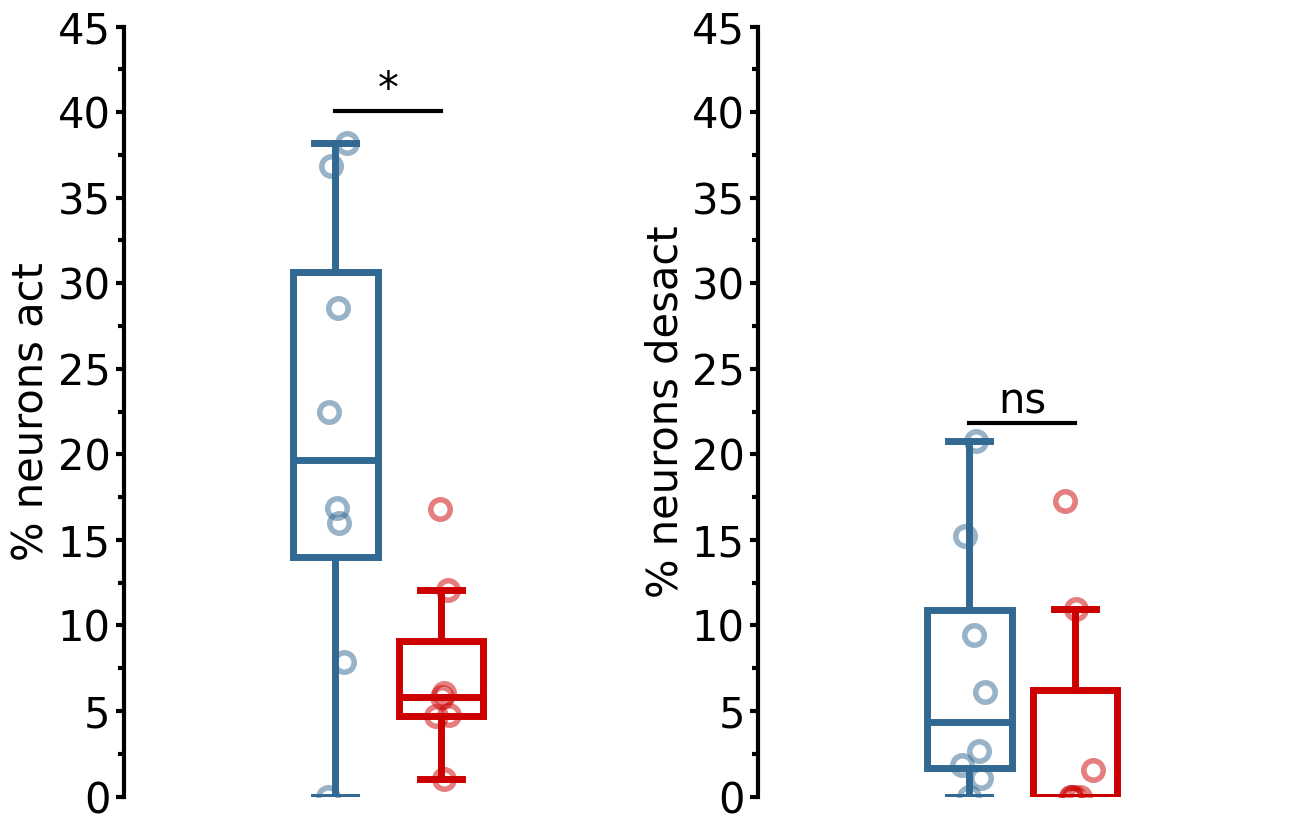

In [5]:
dictionnary_data_exc = pd.read_excel("output_exc.xlsx", sheet_name="mlr_model")
df_exc = pd.DataFrame(dictionnary_data_exc)
genotype_exc = df_exc.iloc[-1]

act_wt_exc = df_exc[df_exc["labels"].str.startswith(('(1', 'Genotype'))]
df_act_exc = pd.DataFrame(act_wt_exc)
wt_act_exc = df_act_exc.iloc[:-1][genotype_exc[genotype_exc == 'WT'].index]
sum_wt_act_exc = wt_act_exc.sum(axis=0)
per_wt_act_exc = round((sum_wt_act_exc/df_exc.iloc[-4][genotype_exc == 'WT'])*100)
act_ko_exc = df_exc[df_exc["labels"].str.startswith(('(1', 'Genotype'))]
df_act_exc = pd.DataFrame(act_ko_exc)
ko_act_exc = df_act_exc.iloc[:-1][genotype_exc[genotype_exc == 'KO'].index]
sum_KO_act_exc = ko_act_exc.sum(axis=0)
per_ko_act_exc = round((sum_KO_act_exc/df_exc.iloc[-4][genotype_exc == 'KO'])*100)
ylabel1 = '% neurons act'

desact_wt_exc = df_exc[df_exc["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_exc = pd.DataFrame(desact_wt_exc)
wt_desact_exc = df_desact_exc.iloc[:-1][genotype_exc[genotype_exc == 'WT'].index]
sum_wt_desact_exc = wt_desact_exc.sum(axis=0)
per_wt_desact_exc = round((sum_wt_desact_exc / df_exc.iloc[-4][genotype_exc == 'WT']) * 100)
desact_ko_exc = df_exc[df_exc["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_exc = pd.DataFrame(desact_ko_exc)
ko_desact_exc = df_desact_exc.iloc[:-1][genotype_exc[genotype_exc == 'KO'].index]
sum_KO_desact_exc = ko_desact_exc.sum(axis=0)
per_ko_desact_exc = round((sum_KO_desact_exc / df_exc.iloc[-4][genotype_exc == 'KO']) * 100)
ylabel2_exc = '% neurons desact'

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

boxplot(ax[0],list(per_wt_act_exc), list(per_ko_act_exc), ylabel1)
boxplot(ax[1],list(per_wt_desact_exc), list(per_ko_desact_exc),ylabel2_exc,ylim=[0,45])
 

Boxplot plotting.
% neurons act
ShapiroResult(statistic=0.6038403497484222, pvalue=0.00017632394023745214)
ShapiroResult(statistic=0.7971536993588704, pvalue=0.038388161080383905)
MannwhitneyuResult(statistic=21.0, pvalue=0.39555053172210153)
Boxplot plotting.
% neurons desact
ShapiroResult(statistic=0.534865954593457, pvalue=2.7042348868213133e-05)
ShapiroResult(statistic=0.4529709881264229, pvalue=4.1356120884447944e-06)
MannwhitneyuResult(statistic=31.5, pvalue=0.6190161801767022)


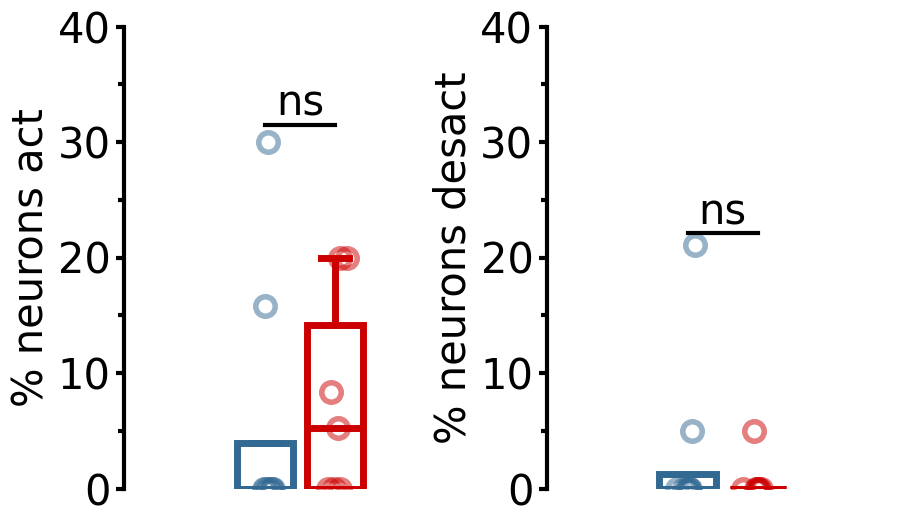

In [6]:
dictionnary_data_inh = pd.read_excel("output_inh.xlsx", sheet_name="mlr_model")
df_inh = pd.DataFrame(dictionnary_data_inh)
genotype_inh = df_inh.iloc[-1]

act_wt_inh = df_inh[df_inh["labels"].str.startswith(('(1', 'Genotype'))]
df_act_inh = pd.DataFrame(act_wt_inh)
wt_act_inh = df_act_inh.iloc[:-1][genotype_exc[genotype_inh == 'WT'].index]
sum_wt_act_inh = wt_act_inh.sum(axis=0)
per_wt_act_inh = round((sum_wt_act_inh / df_inh.iloc[-3][genotype_inh == 'WT']) * 100)
act_ko_inh = df_inh[df_inh["labels"].str.startswith(('(1', 'Genotype'))]
df_act = pd.DataFrame(act_ko_inh)
ko_act_inh = df_act.iloc[:-1][genotype_inh[genotype_inh == 'KO'].index]
sum_KO_act_inh = ko_act_inh.sum(axis=0)
per_ko_act_inh = round((sum_KO_act_inh / df_inh.iloc[-3][genotype_inh == 'KO']) * 100)
ylabel1_inh = '% neurons act'

desact_wt_inh = df_inh[df_inh["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_inh = pd.DataFrame(desact_wt_inh)
wt_desact_inh = df_desact_inh.iloc[:-1][genotype_inh[genotype_inh == 'WT'].index]
sum_wt_desact_inh = wt_desact_inh.sum(axis=0)
per_wt_desact_inh = round((sum_wt_desact_inh / df_exc.iloc[-3][genotype_inh == 'WT']) * 100)
desact_ko_inh = df_inh[df_inh["labels"].str.startswith(('(-1', 'Genotype'))]
df_desact_inh = pd.DataFrame(desact_ko_inh)
ko_desact_inh = df_desact_inh.iloc[:-1][genotype_inh[genotype_inh == 'KO'].index]
sum_KO_desact_inh = ko_desact_inh.sum(axis=0)
per_ko_desact_inh = round((sum_KO_desact_inh / df_exc.iloc[-3][genotype_exc == 'KO']) * 100)
ylabel2_inh = '% neurons desact'

fig_inh, axs_inh = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
boxplot(axs_inh[0], list(per_wt_act_inh), list(per_ko_act_inh), ylabel1_inh)
boxplot(axs_inh[1],list(per_wt_desact_inh), list(per_ko_desact_inh), ylabel2_inh,ylim=[0,40])


Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=0.700485200229471, pvalue=0.0022811247830191272)
ShapiroResult(statistic=0.4529709881264229, pvalue=4.1356120884447944e-06)
MannwhitneyuResult(statistic=35.5, pvalue=0.2977886726944202)
Boxplot plotting.
Neurons (%)
ShapiroResult(statistic=0.9508840453722527, pvalue=0.7201428335397063)
ShapiroResult(statistic=0.8880879389355161, pvalue=0.2648373933702424)
TtestResult(statistic=2.609128800358338, pvalue=0.02162801516526774, df=13.0)


Text(0.5, 0, 'Stimulus & Reward')

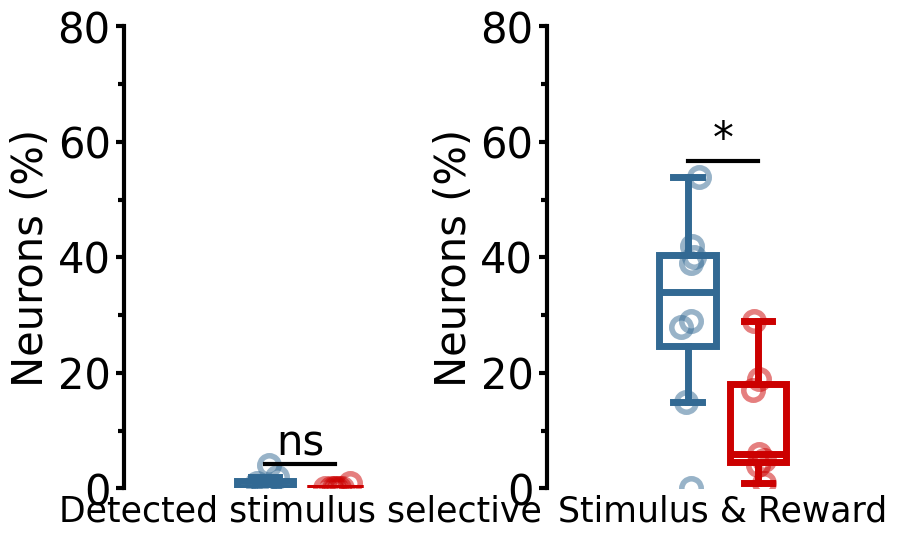

In [11]:
df_select = pd.read_excel("output_exc.xlsx", sheet_name="mlr_model")
df_unselect = df_select.drop(df_select.index[-4:,])
genotype_exc = df_select.iloc[-1]
data_select = ['(1, 1, 0)', '(-1, -1, 0)', '(1, -1, 0)', '(-1, 1, 0)']
data_select_wt = df_select[df_select['labels'].isin(data_select)][genotype_exc[genotype_exc == 'WT'].index]
sum_data_select_wt = data_select_wt.sum(axis=0)
per_sum_data_select_wt = round((sum_data_select_wt / df_exc.iloc[-4][genotype_exc == 'WT']) * 100)
data_select_ko = df_select[df_select['labels'].isin(data_select)][genotype_exc[genotype_exc == 'KO'].index]
sum_data_select_ko = data_select_ko.sum(axis=0)
per_sum_data_select_ko = round((sum_data_select_ko / df_exc.iloc[-4][genotype_exc == 'KO']) * 100)
data_unselect_wt = df_unselect[~df_unselect['labels'].isin(data_select)][genotype_exc[genotype_exc == 'WT'].index]
sum_data_unselect_wt = data_unselect_wt.sum(axis=0)
per_sum_data_unselect_wt = round((sum_data_unselect_wt / df_exc.iloc[-4][genotype_exc == 'WT']) * 100)
data_unselect_ko = df_unselect[~df_unselect['labels'].isin(data_select)][genotype_exc[genotype_exc == 'KO'].index]
sum_data_unselect_ko = data_unselect_ko.sum(axis=0)
per_sum_data_unselect_ko = round((sum_data_unselect_ko / df_exc.iloc[-4][genotype_exc == 'KO']) * 100)
ylabel_select = "Neurons (%)"
ylabel_unselect = "Neurons (%)"
fig_exc, axs_exc = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
boxplot(axs_exc[0], np.array(per_sum_data_select_wt, "int"), np.array(per_sum_data_select_ko,"int"), ylabel_select, ylim=[0,80])
axs_exc[0].set_xlabel("Detected stimulus selective", fontsize=25)
boxplot(axs_exc[1], np.array(per_sum_data_unselect_wt, "int"), np.array(per_sum_data_unselect_ko, "int"), ylabel_unselect)
axs_exc[1].set_xlabel("Stimulus & Reward", fontsize = 25)